Actual area: 0.77687
Estimated area: 0.77948
Error: 0.336%


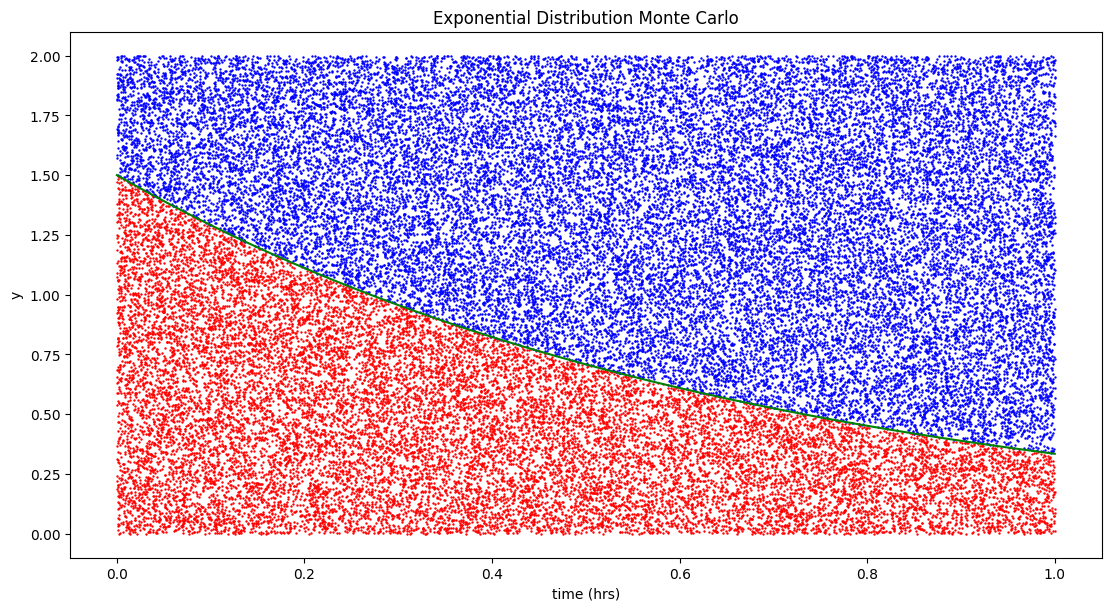

In [1]:
"""mc_exp_dist.ipynb"""
# Cell 1 (PRNG)

from __future__ import annotations
import typing
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt
from numba import float64, vectorize
if typing.TYPE_CHECKING:
    from matplotlib.axes import Axes
    from numpy.random import Generator
    from numpy.typing import NDArray

iterations: int = 50_000

def f(x: float) -> float:
    return 1.5 * np.exp(-1.5 * x)

def plot_prng(ax: Axes) -> None:
    rng: Generator = default_rng(seed=2023)
    x: NDArray[np.float_] = rng.random(iterations)
    y: NDArray[np.float_] = rng.random(iterations) * 2

    f: NDArray[np.float_] = 1.5 * np.exp(-1.5 * x)

    x_under: NDArray[np.float_] = x[y <= f]
    y_under: NDArray[np.float_] = y[y <= f]
    x_over: NDArray[np.float_] = x[y > f]
    y_over: NDArray[np.float_] = y[y > f]

    pixel_size: float = (72 / ax.figure.dpi) ** 2

    ax.scatter(x_under, y_under, color="red", s=pixel_size)
    ax.scatter(x_over, y_over, color="blue", s=pixel_size)

    x_true: NDArray[np.float_] = np.linspace(0, 1, 1000)
    y_true: NDArray[np.float_] = 1.5 * np.exp(-1.5 * x_true)
    ax.plot(x_true, y_true, color="green")

    est_area: float = np.count_nonzero(y <= f) / iterations * 2
    act_area: float = 1 - np.exp(-1.5)
    error: float = (est_area - act_area) / act_area
    
    ax.set_title(rf"Exponential Distribution Monte Carlo")
    ax.set_xlabel("time (hrs)")
    ax.set_ylabel("y")

    print(f"Actual area: {act_area:.5}")
    print(f"Estimated area: {est_area:.5}")
    print(f"Error: {error * 100:.3}%")


plt.close("all")
plt.figure(" ", figsize=(11, 6), constrained_layout=True)
plot_prng(plt.axes())
plt.show()

Actual area: 0.77687
Estimated area: 0.77732
Error: 0.0579%


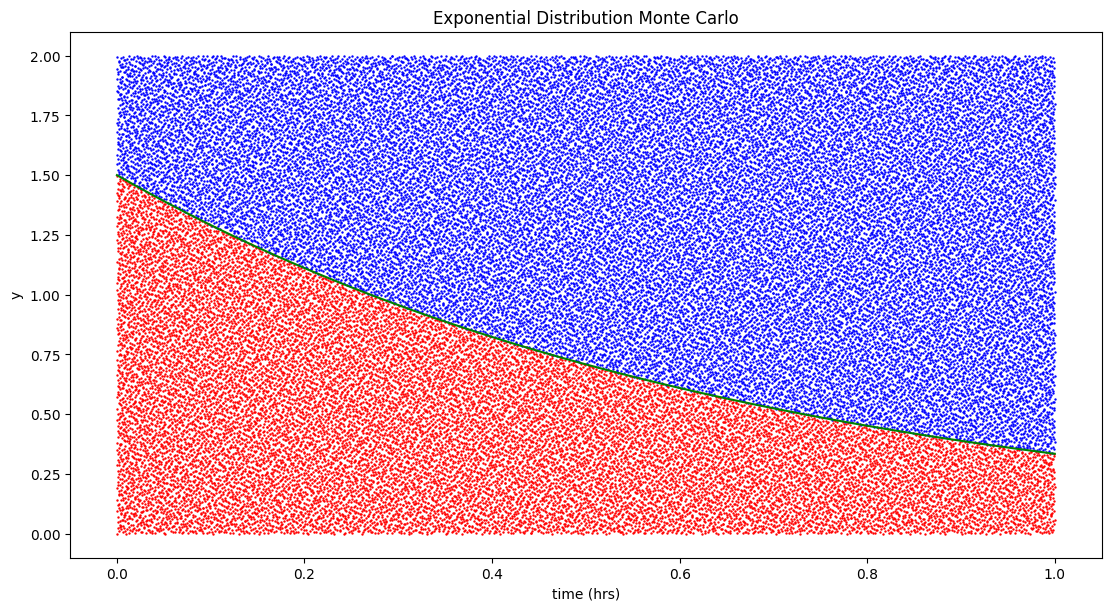

In [3]:
# Cell 2 (QRNG)

# Copied from mc_circle_qrng.ipynb
@vectorize([float64(float64, float64)], nopython=True)  # type: ignore
def halton(n: float, p: int) -> float:
    h = 0
    f = 1
    while n > 0:
        f: float = f / p
        h += (n % p) * f
        n = int(n / p)
    return h

def plot_qrng(ax: Axes) -> None:
    x: NDArray[np.float_] = halton(np.arange(iterations), 2)
    y: NDArray[np.float_] = halton(np.arange(iterations), 3) * 2

    f: NDArray[np.float_] = 1.5 * np.exp(-1.5 * x)

    x_under: NDArray[np.float_] = x[y <= f]
    y_under: NDArray[np.float_] = y[y <= f]
    x_over: NDArray[np.float_] = x[y > f]
    y_over: NDArray[np.float_] = y[y > f]

    pixel_size: float = (72 / ax.figure.dpi) ** 2

    ax.scatter(x_under, y_under, color="red", s=pixel_size)
    ax.scatter(x_over, y_over, color="blue", s=pixel_size)

    est_area: float = np.count_nonzero(y <= f) / iterations * 2
    act_area: float = 1 - np.exp(-1.5)
    error: float = (est_area - act_area) / act_area

    x_true: NDArray[np.float_] = np.linspace(0, 1, 1000)
    y_true: NDArray[np.float_] = 1.5 * np.exp(-1.5 * x_true)
    ax.plot(x_true, y_true, color="green")

    ax.set_title(rf"Exponential Distribution Monte Carlo")
    ax.set_xlabel("time (hrs)")
    ax.set_ylabel("y")

    print(f"Actual area: {act_area:.5}")
    print(f"Estimated area: {est_area:.5}")
    print(f"Error: {error * 100:.3}%")


plt.close("all")
plt.figure(" ", figsize=(11, 6), constrained_layout=True)
plot_qrng(plt.axes())
plt.show()